## Projet 5 : Segmentez des clients d'un site e-commerce

#### Notebook analyse

In [21]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
customers = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/olist_customers_dataset.csv')
geolocalisation = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/olist_geolocation_dataset.csv')
order_items = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/olist_order_items_dataset.csv')
order_payments = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/olist_order_reviews_dataset.csv')
orders = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/olist_orders_dataset.csv')
products = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/olist_products_dataset.csv')
sellers = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/olist_sellers_dataset.csv')
translation = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/product_category_name_translation.csv')

In [4]:
customers['customer_id'].shape

(99441,)

In [5]:
customers['customer_unique_id'].nunique()

96096

In [6]:
orders.shape

(99441, 8)

In [7]:
order_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [8]:
customers.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [9]:
order_payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [10]:
order_reviews.head(1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


In [11]:
orders.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [12]:
products.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [13]:
sellers.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


In [14]:
translation.head(1)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


In [15]:
customers.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [23]:
products.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


#### regrouper les order id entre eux (identifiant unique de la commande) 

In [24]:
print (orders.shape)
print (order_items.shape)
print (order_payments.shape)
print (order_reviews.shape)

(99441, 8)
(112650, 7)
(103886, 5)
(100000, 7)


In [26]:
commandes = pd.merge(pd.merge(pd.merge(orders,order_items,on='order_id'),order_payments,on='order_id'),
                     order_reviews,on='order_id')

print(commandes.shape)
print(products.shape)
commandes = pd.merge(commandes,products,on='product_id')
print(commandes.shape)
df = pd.merge(customers,commandes,on='customer_id')
print(df.shape)

(118315, 24)
(32951, 9)
(118315, 32)
(118315, 36)


In [28]:
commandes.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,2017-08-19 00:00:00,2017-08-20 15:16:36,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,2017-08-08 00:00:00,2017-08-08 23:26:23,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,...,2017-11-08 00:00:00,2017-11-10 19:52:38,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
6,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
7,40c5e18f7d112b59b3e5113a59a905b3,67407057a7d5ee17d1cd09523f484d13,delivered,2018-06-11 10:25:52,2018-06-11 10:58:32,2018-06-14 13:03:00,2018-06-19 00:31:13,2018-07-16 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,2018-06-20 00:00:00,2018-06-20 13:12:42,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
8,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,2018-08-15 00:00:00,2018-08-18 16:12:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
9,f913d229653fdd809c249ed98ab6b754,e1365d7b227b247b6bc0931771885eaf,delivered,2018-04-30 02:18:32,2018-04-30 03:00:14,2018-04-30 13:54:00,2018-05-08 17:53:51,2018-05-24 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,2018-05-09 00:00:00,2018-05-10 01:17:48,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0


In [29]:
def num_missing(df):
    return sum(df.isnull())
# On applique cette fonction pour chaque colonne:
print("Valeursmanquantes par colonne:")
print(df.apply(num_missing, axis=0))

Valeursmanquantes par colonne:
customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_co

In [30]:
df['customer_unique_id'].nunique()

95419

#### Objectif est de créer une fonction pour avoir un df , avec une ligne par clients et en colonnes les différentes features créées

In [31]:
def creation_du_dataset(df):
      
    ## nettoyage

    
    df['review_comment_message'].fillna("no comme", inplace=True)
    df =df.drop(['review_comment_title'],axis=1)
    df = df.dropna()
    print(df.shape)
    print("le nombre de valeur identifiant unique : ", df['customer_unique_id'].nunique())
   
    
    ##feature engineering
    
    # achat moyen 
    
    achat_moy = df[['customer_unique_id','price']].groupby(['customer_unique_id']).mean()
    achat_moy = achat_moy.rename(columns = {'price': 'achat_moy'})
    achat_moy = achat_moy.reset_index()
    print("le nombre de valeur identifiant unique : ",achat_moy['customer_unique_id'].nunique())
    #print(achat_moy.shape)
    
    
    # nombre d'achat
    
    nombre_achat_par_client = df[['customer_unique_id','product_id']].groupby(['customer_unique_id']).count()
    nombre_achat_par_client = nombre_achat_par_client.rename(columns = {'product_id': 'nombre_achat_par_client'})
    nombre_achat_par_client = nombre_achat_par_client.reset_index()
    print("le nombre de valeur identifiant unique : ",nombre_achat_par_client['customer_unique_id'].nunique())
    #print(nombre_achat_par_client.shape)
    
    # note moyenne 
    
    note_moyenne = df[['customer_unique_id','review_score']].groupby(['customer_unique_id']).mean()
    note_moyenne = note_moyenne.rename(columns = {'review_score': 'note'})
    note_moyenne = note_moyenne.reset_index()
    print("le nombre de valeur identifiant unique : ",note_moyenne['customer_unique_id'].nunique())
    
    #type de paiment
    
    type_de_paiment = df[['customer_unique_id','payment_type']].groupby([
        'customer_unique_id'])['payment_type'].apply(lambda x: x.mode()[0])
    type_de_paiment = pd.DataFrame(type_de_paiment)
    type_de_paiment = type_de_paiment.reset_index()
    print("le nombre de valeur identifiant unique : ",type_de_paiment['customer_unique_id'].nunique())
    
    
    # le client paie en combien de fois 
    divise_le_paiment = df[['customer_unique_id','payment_installments']].groupby(['customer_unique_id']).mean()
    divise_le_paiment = divise_le_paiment.reset_index()
    print("le nombre de valeur identifiant unique : ",divise_le_paiment['customer_unique_id'].nunique())
    
    
    # les villes où l'on achete 
    ville = df[['customer_unique_id','customer_city']].groupby([
        'customer_unique_id'])['customer_city'].apply(lambda x: x.mode()[0])
    ville = pd.DataFrame(ville)
    ville = ville.reset_index()
    print("le nombre de valeur identifiant unique : ",ville['customer_unique_id'].nunique())
    #print(ville.shape)
    
    # les etat où l'on achette le plus 
    etat = df[['customer_unique_id','customer_state']].groupby([
        'customer_unique_id'])['customer_state'].apply(lambda x: x.mode()[0])
    etat = pd.DataFrame(etat)    
    etat = etat.reset_index()
    print("le nombre de valeur identifiant unique : ",etat['customer_unique_id'].nunique())
    
    # delais de la commande 
    delai_commande = df[['customer_unique_id','order_purchase_timestamp','order_delivered_customer_date']].groupby([
        'customer_unique_id']).head(5)
    delai_commande['order_purchase_timestamp'] = delai_commande['order_purchase_timestamp'].astype('datetime64')
    delai_commande['order_delivered_customer_date'] = pd.to_datetime(delai_commande['order_delivered_customer_date'], 
                                                                     errors='coerce')
    delai_commande['delai_commande'] = delai_commande['order_delivered_customer_date']- delai_commande[
        'order_purchase_timestamp']
    delai_commande = delai_commande.drop(['order_purchase_timestamp','order_delivered_customer_date'],axis=1)
    #print(delai_commande.shape)
    print("le nombre de valeur identifiant unique : ",delai_commande['customer_unique_id'].nunique())
    
    #le jour de la semaine
    jour_achat = df[['customer_unique_id','order_purchase_timestamp','order_delivered_customer_date']].groupby([
    'customer_unique_id']).head(5)
    jour_achat['order_purchase_timestamp'] = jour_achat['order_purchase_timestamp'].astype('datetime64')
    jour_achat['jour_achat'] = jour_achat['order_purchase_timestamp'].apply(lambda x: x.weekday())
    jour_achat = jour_achat.drop(['order_purchase_timestamp','order_delivered_customer_date'],axis=1)
    print("le nombre de valeur identifiant unique : ",jour_achat['customer_unique_id'].nunique())
    #print(jour_achat.shape)
    
    #heure achat
    
    heure_achat = df[['customer_unique_id','order_purchase_timestamp','order_delivered_customer_date']].groupby([
    'customer_unique_id']).head(5)
    heure_achat['order_purchase_timestamp'] = heure_achat['order_purchase_timestamp'].astype('datetime64')
    heure_achat['heure_de_achat'] = heure_achat['order_purchase_timestamp'].apply(lambda x: x.hour)
    heure_achat = heure_achat.drop(['order_purchase_timestamp','order_delivered_customer_date'],axis=1)
    print("le nombre de valeur identifiant unique : ",heure_achat['customer_unique_id'].nunique())
    #print(heure_achat.shape)
    
    # taille du commentaire 
    
    for label, row in df.iterrows():
        df.loc[label, 'longeur_du_commentaire'] =len(row['review_comment_message'])
    taille_commentaire = df[['customer_unique_id','longeur_du_commentaire']].groupby(['customer_unique_id']).mean()
    taille_commentaire = taille_commentaire.reset_index()
    print("le nombre de valeur identifiant unique : ",taille_commentaire['customer_unique_id'].nunique())
    
    #produit le plus acheté 
    
    produit_le_plus_acheté = df[['customer_unique_id','product_category_name']].groupby([
        'customer_unique_id'])['product_category_name'].apply(lambda x: x.mode()[0])
    produit_le_plus_acheté = pd.DataFrame(produit_le_plus_acheté)
    produit_le_plus_acheté = produit_le_plus_acheté.reset_index()
    print("le nombre de valeur identifiant unique : ",produit_le_plus_acheté['customer_unique_id'].nunique())
    #print(produit_le_plus_acheté.shape)
    
    ### Rassembler 
    
    df_f = nombre_achat_par_client.merge(achat_moy)
    print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(note_moyenne)
    print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(type_de_paiment)
    print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(divise_le_paiment)
    print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(ville)
    print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(etat)
    print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(delai_commande)
    print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(jour_achat)
    print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(heure_achat)
    print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(taille_commentaire)
    print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(produit_le_plus_acheté)
    print(df_f['customer_unique_id'].nunique())
    
    
    # un client par ligne
  
    df_f = df_f.drop_duplicates(['customer_unique_id'])

    
    
    
    
    return df_f

In [32]:
df_f = creation_du_dataset(df)

(114073, 35)
le nombre de valeur identifiant unique :  92081
le nombre de valeur identifiant unique :  92081
le nombre de valeur identifiant unique :  92081
le nombre de valeur identifiant unique :  92081
le nombre de valeur identifiant unique :  92081
le nombre de valeur identifiant unique :  92081
le nombre de valeur identifiant unique :  92081
le nombre de valeur identifiant unique :  92081
le nombre de valeur identifiant unique :  92081
le nombre de valeur identifiant unique :  92081
le nombre de valeur identifiant unique :  92081
le nombre de valeur identifiant unique :  92081
le nombre de valeur identifiant unique :  92081
92081
92081
92081
92081
92081
92081
92081
92081
92081
92081
92081


In [33]:
len(set(df_f.index))

92081

In [34]:
(df_f.sort_values(by=['customer_unique_id']).head(5))

,customer_unique_id,nombre_achat_par_client,achat_moy,note,payment_type,payment_installments,customer_city,customer_state,delai_commande,jour_achat,heure_de_achat,longeur_du_commentaire,product_category_name
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,5.0,credit_card,8.0,cajamar,SP,6 days 09:52:10,3,10,111.0,cama_mesa_banho
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,4.0,credit_card,1.0,osasco,SP,3 days 06:51:15,0,11,8.0,beleza_saude
2,0000f46a3911fa3c0805444483337064,1,69.00,3.0,credit_card,8.0,sao jose,SC,25 days 17:33:44,4,21,8.0,papelaria
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,4.0,credit_card,4.0,belem,PA,20 days 00:53:24,3,20,12.0,telefonia
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,5.0,credit_card,6.0,sorocaba,SP,13 days 03:23:14,1,19,8.0,telefonia


#### Réduire le nombre de catégories

In [35]:
def cat (df_f):
    
    # Mettre les produits par catégories
    
    électro = ['utilidades_domesticas','eletrodomesticos','portateis_casa_forno_e_cafe',
               'portateis_cozinha_e_preparadores_de_alimentos']
    bureau = ['moveis_escritorio']
    
    techno = ['informatica_acessorios','eletronicos','telefonia','relogios_presentes','eletroportateis','consoles_games',
    'telefonia_fixa','eletrodomesticos_2','pc_gamer']
    
    cultu = ['artes','livros_interesse_geral','livros_tecnicos','livros_importados','dvds_blu_ray','artes_e_artesanato','cine_foto',
    'cds_dvds_musicais']
    
    sport = ['esporte_lazer']
    
    pdt_de_beauté = ['perfumaria','bebes','beleza_saude','fraldas_higiene']
    
    musiq = ['instrumentos_musicais','artigos_de_festas','audio','musica']
    
    autre = ['cool_stuff','brinquedos','malas_acessorios','papelaria','pcs',
             'sinalizacao_e_seguranca','industria_comercio_e_negocios',
    'tablets_impressao_imagem','artigos_de_natal','flores','seguros_e_servicos']
    
    maiso = ['moveis_decoracao','cama_mesa_banho','construcao_ferramentas_seguranca',
             'ferramentas_jardim','casa_construcao',
    'construcao_ferramentas_construcao','moveis_sala','climatizacao',
             'moveis_cozinha_area_de_servico_jantar_e_jardim','la_cuisine',
    'construcao_ferramentas_jardim','casa_conforto','moveis_quarto','casa_conforto_2','moveis_colchao_e_estofado']
    
    voitu = ['automotivo']
    
    mod = ['fashion_calcados','fashion_bolsas_e_acessorios','fashion_underwear_e_moda_praia',
           'fashion_roupa_masculina',
    'fashion_roupa_feminina','fashion_esporte','fashion_roupa_infanto_juvenil']
    
    anim = ['pet_shop']
    nourr = ['agro_industria_e_comercio','bebidas','market_place','alimentos_bebidas','alimentos']
    oult = ['construcao_ferramentas_ferramentas','construcao_ferramentas_iluminacao']


    for elt in pdt_de_beauté:
        df_f['product_category_name'] = df_f['product_category_name'].replace(elt,"produit_de_beauté")
    for elt in électro:
        df_f['product_category_name'] = df_f['product_category_name'].replace(elt,"électroménagers")
    for elt in bureau:
        df_f['product_category_name'] = df_f['product_category_name'].replace(elt,"bureau")
    for elt in techno:
        df_f['product_category_name'] = df_f['product_category_name'].replace(elt,"technologie")
    for elt in cultu:
        df_f['product_category_name'] = df_f['product_category_name'].replace(elt,"culture")
    for elt in sport:
        df_f['product_category_name'] = df_f['product_category_name'].replace(elt,"sport")    
    for elt in musiq:
        df_f['product_category_name'] = df_f['product_category_name'].replace(elt,"musique")
    for elt in autre:
        df_f['product_category_name'] = df_f['product_category_name'].replace(elt,"autre")    
    for elt in maiso:
        df_f['product_category_name'] = df_f['product_category_name'].replace(elt,"maison")    
    for elt in voitu:
        df_f['product_category_name'] = df_f['product_category_name'].replace(elt,"voiture")
    for elt in mod:
        df_f['product_category_name'] = df_f['product_category_name'].replace(elt,"mode")            
    for elt in anim:
        df_f['product_category_name'] = df_f['product_category_name'].replace(elt,"animaux")
    for elt in nourr:
        df_f['product_category_name'] = df_f['product_category_name'].replace(elt,"nourriture")      
    for elt in oult:
        df_f['product_category_name'] = df_f['product_category_name'].replace(elt,"oultil") 
        
        
    return df_f


In [36]:
df_f = cat(df_f)

In [37]:
df_f.head(5)

,customer_unique_id,nombre_achat_par_client,achat_moy,note,payment_type,payment_installments,customer_city,customer_state,delai_commande,jour_achat,heure_de_achat,longeur_du_commentaire,product_category_name
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,5.0,credit_card,8.0,cajamar,SP,6 days 09:52:10,3,10,111.0,maison
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,4.0,credit_card,1.0,osasco,SP,3 days 06:51:15,0,11,8.0,produit_de_beauté
2,0000f46a3911fa3c0805444483337064,1,69.00,3.0,credit_card,8.0,sao jose,SC,25 days 17:33:44,4,21,8.0,autre
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,4.0,credit_card,4.0,belem,PA,20 days 00:53:24,3,20,12.0,technologie
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,5.0,credit_card,6.0,sorocaba,SP,13 days 03:23:14,1,19,8.0,technologie


#### Exploration du dataset

In [38]:
print("le df est de : ",df_f.shape)
print("le nombre de valeur manquantes: ", sum(df_f.isnull().values.ravel()))

le df est de :  (92081, 13)
le nombre de valeur manquantes:  0


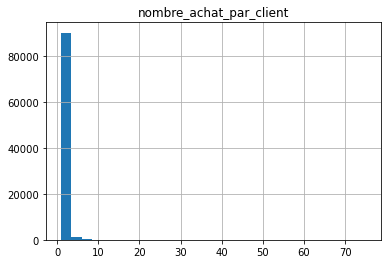

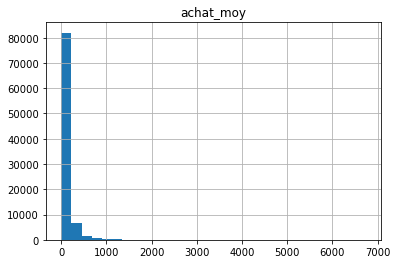

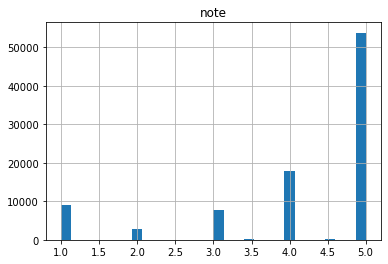

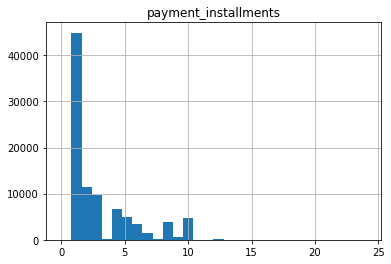

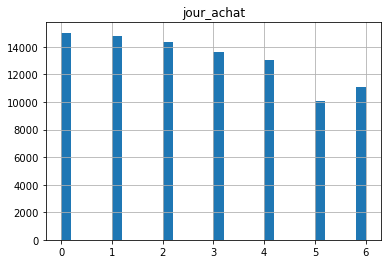

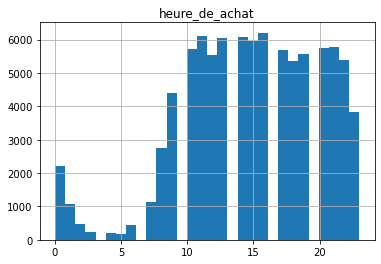

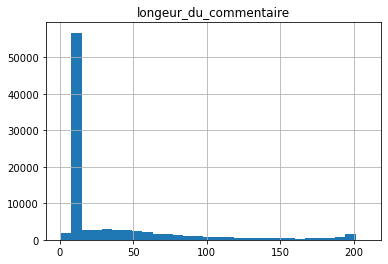

In [39]:
for col in df_f.select_dtypes(include=['float64','int64']):
    df_f.hist(column=col,bins=30)

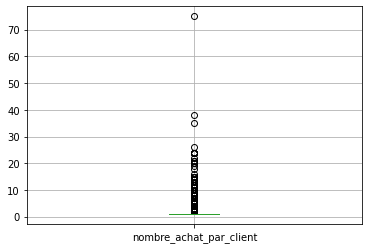

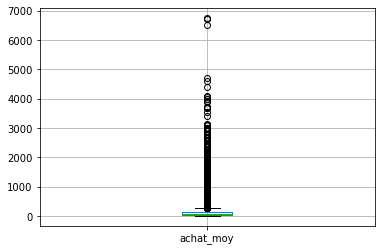

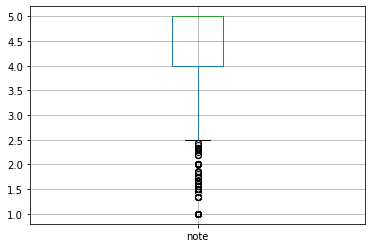

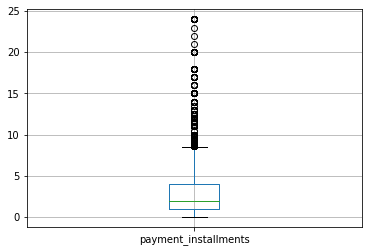

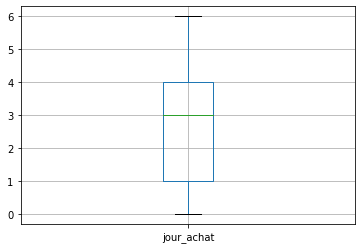

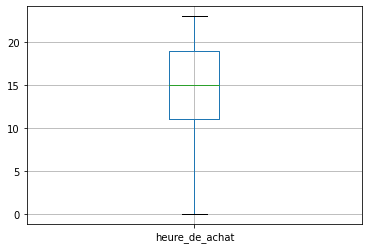

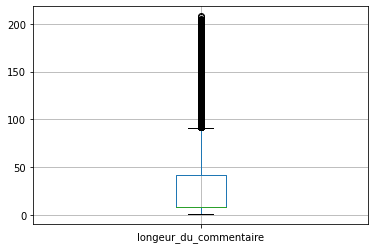

In [40]:
for col in df_f.select_dtypes(include=['float64','int64']):
    plt.figure()
    df_f.boxplot(col)

In [41]:
df_f = df_f.set_index('customer_unique_id')

#### Visualisation des features

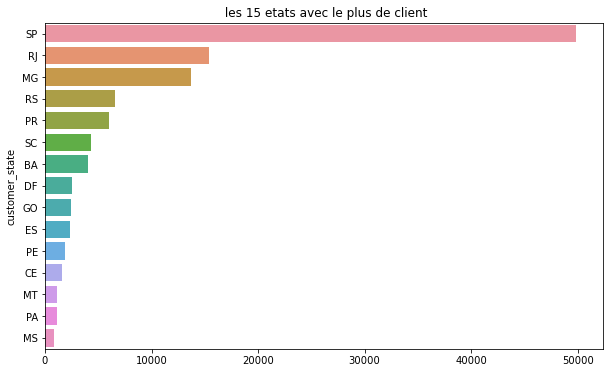

In [42]:
mode_de_paiment = df.groupby(['customer_state']).count().sort_values(
    by='customer_city', ascending=False)['customer_city'].head(15)
plt.figure(figsize=(10,6))
plt.title(' les 15 etats avec le plus de client')
sns.barplot(x = mode_de_paiment.values,
           y = mode_de_paiment.index)

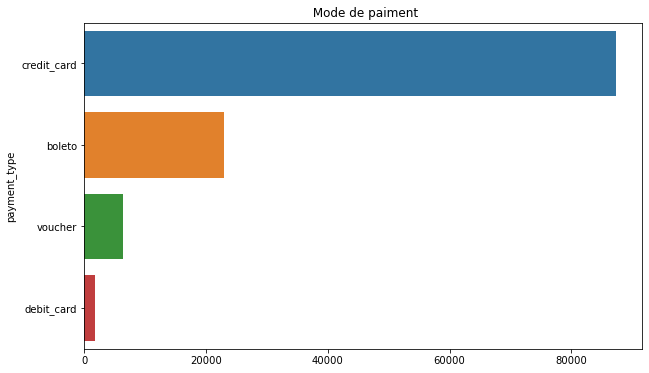

In [44]:
mode_de_paiment = df.groupby(['payment_type']).count().sort_values(
    by='customer_city', ascending=False)['customer_city'].head()
plt.figure(figsize=(10,6))
plt.title(' Mode de paiment')
sns.barplot(x = mode_de_paiment.values,
           y = mode_de_paiment.index)

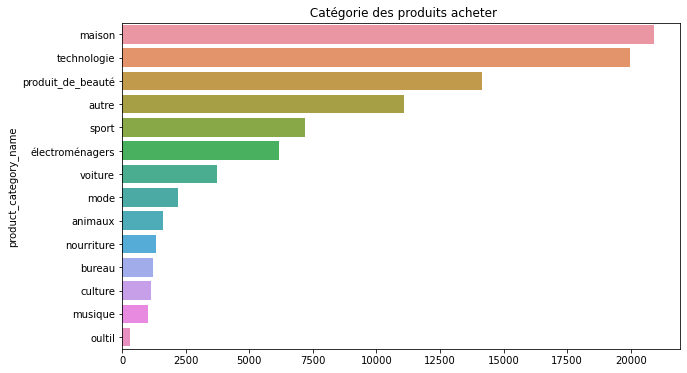

In [46]:
produit_acheté = df_f.groupby(['product_category_name']).count().sort_values(
    by='customer_city', ascending=False)['customer_city'].head(20)
plt.figure(figsize=(10,6))
plt.title(' Catégorie des produits acheter')
sns.barplot(x = produit_acheté.values,
           y = produit_acheté.index)

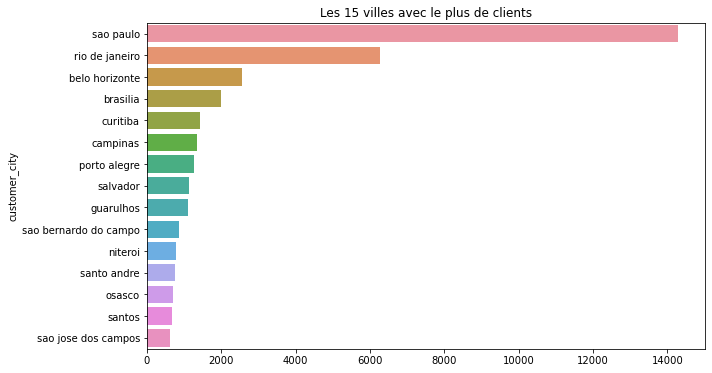

In [47]:
ville = df_f.groupby(['customer_city']).count()[
    'customer_state'].sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
plt.title('Les 15 villes avec le plus de clients')
sns.barplot(x = ville.values,
           y = ville.index)

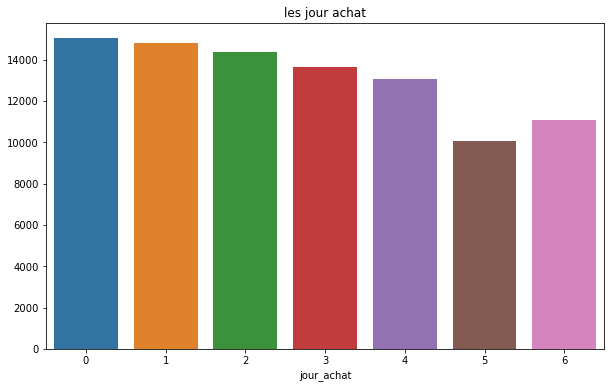

In [48]:
les_horaire = df_f.groupby(['jour_achat']).count()[
    'customer_state'].sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
plt.title('les jour achat')
sns.barplot(x = les_horaire.index,
           y = les_horaire.values)      

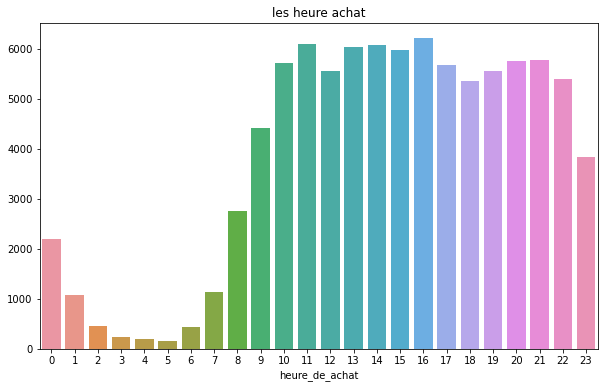

In [49]:
les_horaire = df_f.groupby(['heure_de_achat']).count()[
    'customer_state'].sort_values(ascending=False).head(24)
plt.figure(figsize=(10,6))
plt.title('les heure achat')
sns.barplot(x = les_horaire.index,
           y = les_horaire.values)  

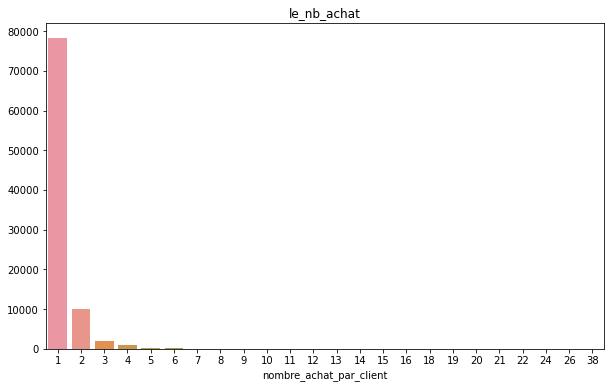

In [50]:
le_nb_achat = df_f.groupby(['nombre_achat_par_client']).count()[
    'customer_state'].sort_values(ascending=False).head(24)
plt.figure(figsize=(10,6))
plt.title('le_nb_achat')
sns.barplot(x = le_nb_achat.index,
           y = le_nb_achat.values) 

très peu de gens commandent plusieurs fois sur le site

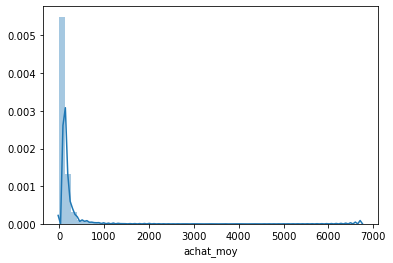

In [51]:
sns.distplot(df_f['achat_moy'])

#### Enregistrement du df

In [53]:
df_f.to_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/new_df.csv')